In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Online_Retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.2+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [6]:
df['CustomerID'].value_counts()

17841.0    7983
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
           ... 
15668.0       1
15657.0       1
13307.0       1
16138.0       1
16765.0       1
Name: CustomerID, Length: 3950, dtype: int64

In [7]:
df['Quantity'].value_counts()

 1        146162
 2         78473
 12        50435
 3         35262
 6         35196
           ...  
-204           1
-618           1
-472           1
-161           1
-80995         1
Name: Quantity, Length: 715, dtype: int64

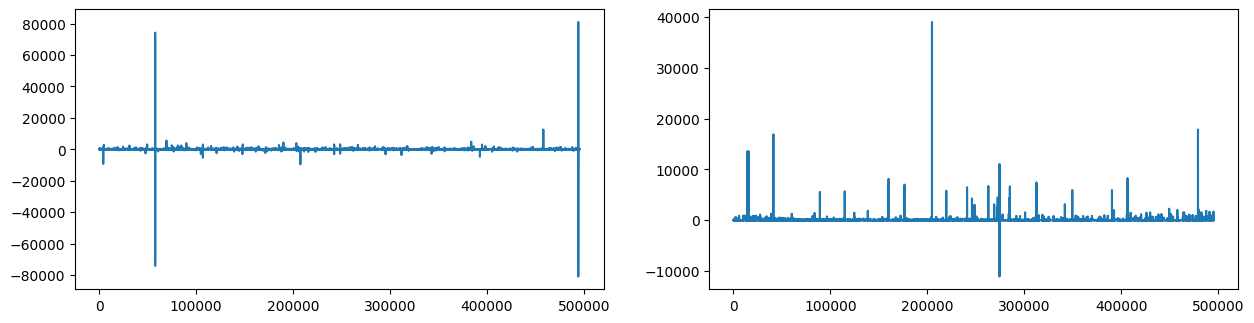

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(df['Quantity'])
plt.subplot(2,2,2)
plt.plot(df['UnitPrice'])
plt.show()

In [9]:
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

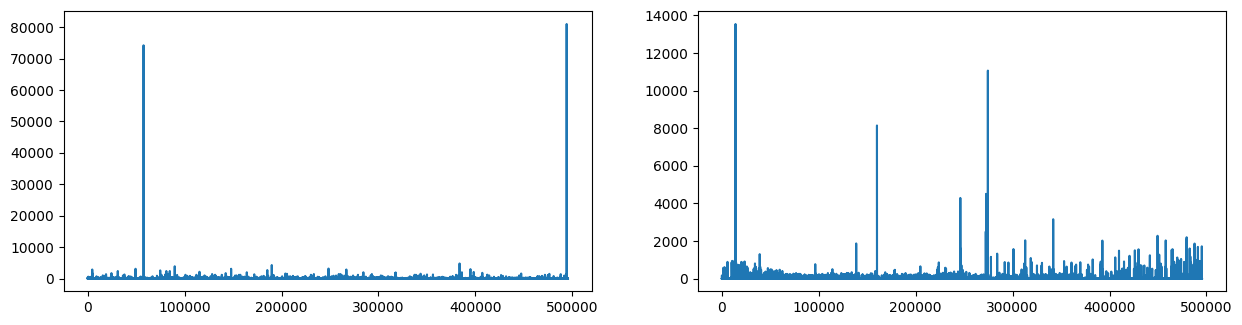

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(df['Quantity'])
plt.subplot(2,2,2)
plt.plot(df['UnitPrice'])
plt.show()

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    485123 non-null  object        
 1   StockCode    485123 non-null  object        
 2   Description  485123 non-null  object        
 3   Quantity     485123 non-null  int64         
 4   InvoiceDate  485123 non-null  datetime64[ns]
 5   UnitPrice    485123 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      485123 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.3+ MB


In [13]:
df['StockCode'].value_counts()

85123A    2169
85099B    1957
22423     1710
47566     1614
20725     1421
          ... 
44265        1
84795C       1
17028J       1
84201C       1
23843        1
Name: StockCode, Length: 3916, dtype: int64

##### Returned items indicated with C so we can drop them by filtering

In [14]:
df['StockCode'].str.contains('C').value_counts()

False    479079
True       6044
Name: StockCode, dtype: int64

In [15]:
df = df[~df['StockCode'].str.contains('C')]

In [16]:
df['StockCode'].str.contains('C').value_counts()

False    479079
Name: StockCode, dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [19]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128535
Country             0
dtype: int64

In [20]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128535
Country             0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [23]:
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
495473,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
495474,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
495475,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
495476,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [25]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [26]:
import datetime as dt

In [27]:
now =  dt.datetime(2011,12,10)

In [28]:
 rfm  = df.groupby('CustomerID').agg({'InvoiceDate' : lambda day : (now - day.max()).days,
                             'InvoiceNo' : lambda num : len(num),
                             'Total_Price' : lambda price : price.sum() })


In [29]:
col_list = ['Recency', 'Frequency', 'Monetary']

In [30]:
rfm.columns = col_list

In [31]:
rfm['R'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
rfm['F'] = pd.qcut(rfm['Frequency'],5,labels=[1,2,3,4,5])
rfm['M'] = pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [32]:
rfm['RFM_Score'] = rfm['R'].astype('str') + rfm['F'].astype('str') + rfm['M'].astype('str')

In [33]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12747.0,2,100,4128.71,5,4,5,545
12748.0,0,4345,32509.54,5,5,5,555
12749.0,3,196,4014.18,5,5,5,555
12820.0,3,59,942.34,5,4,4,544
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111
18281.0,180,7,80.82,1,1,1,111
18282.0,7,12,178.05,5,1,1,511


In [34]:
seg_map = {r'[1-2][1-2]' : 'Hibernating',
r'[1-2][3-4]' : 'At-Risk',
r'[1-2]5' : "Can't Loose",
r'[3][1-2]' : 'About to Sleep',
r'33' : 'Need Attention',
r'[3-4][4-5]' : 'Loyal Customers',
r'41' : 'Promising',
r'51' : 'New Customers',
r'[4-5][2-3]' : 'Potential Loyalist',
r'5[4-5]' : 'Champions',
}

In [35]:
rfm['Segment'] = rfm['R'].astype('str') + rfm['F'].astype('str')
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [36]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12747.0,2,100,4128.71,5,4,5,545,Champions
12748.0,0,4345,32509.54,5,5,5,555,Champions
12749.0,3,196,4014.18,5,5,5,555,Champions
12820.0,3,59,942.34,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111,Hibernating
18281.0,180,7,80.82,1,1,1,111,Hibernating
18282.0,7,12,178.05,5,1,1,511,New Customers


In [37]:
rfm.groupby('Segment').mean().sort_values('Monetary')

,Recency,Frequency,Monetary
Segment,,,
About to Sleep,52.219178,15.267123,435.219486
Promising,22.428571,7.183673,445.777347
Hibernating,207.501042,12.985417,537.732126
Need Attention,51.410256,40.523077,815.458821
Potential Loyalist,15.753846,33.876923,879.101826
At-Risk,167.796154,55.523077,884.872462
Can't Loose,145.901408,180.098592,2268.055930
Loyal Customers,33.410788,152.181189,2428.635339
New Customers,6.145833,7.062500,4111.827083


In [38]:
rfm['Segment'].value_counts()

Hibernating           960
Loyal Customers       723
Champions             553
At-Risk               520
Potential Loyalist    455
About to Sleep        292
Need Attention        195
Promising              98
Can't Loose            71
New Customers          48
Name: Segment, dtype: int64

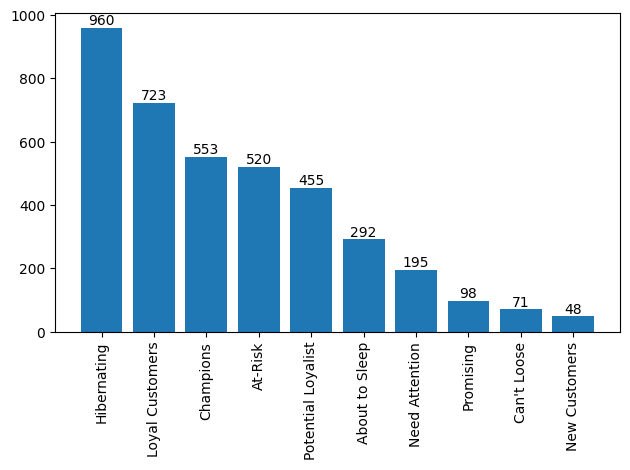

In [39]:
fig, ax = plt.subplots()
plt.xticks(rotation=90) 
bars = ax.bar(rfm['Segment'].value_counts().index, rfm['Segment'].value_counts())
ax.bar_label(bars)
plt.tight_layout()
plt.show()  

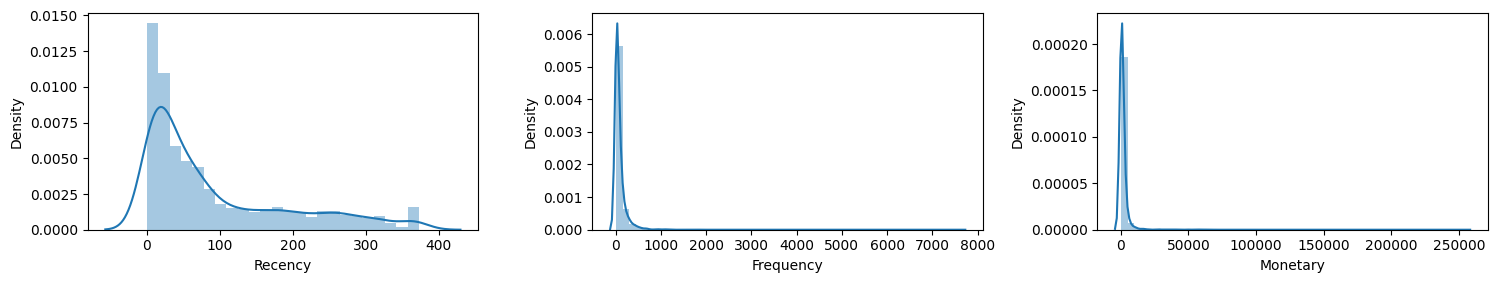

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.distplot(rfm['Recency'], kde=True);
plt.subplot(3,3,2)
sns.distplot(rfm['Frequency'], kde=True);
plt.subplot(3,3,3)
sns.distplot(rfm['Monetary'], kde=True);
plt.tight_layout()

In [41]:
import squarify

(0.0, 100.0, 0.0, 100.0)

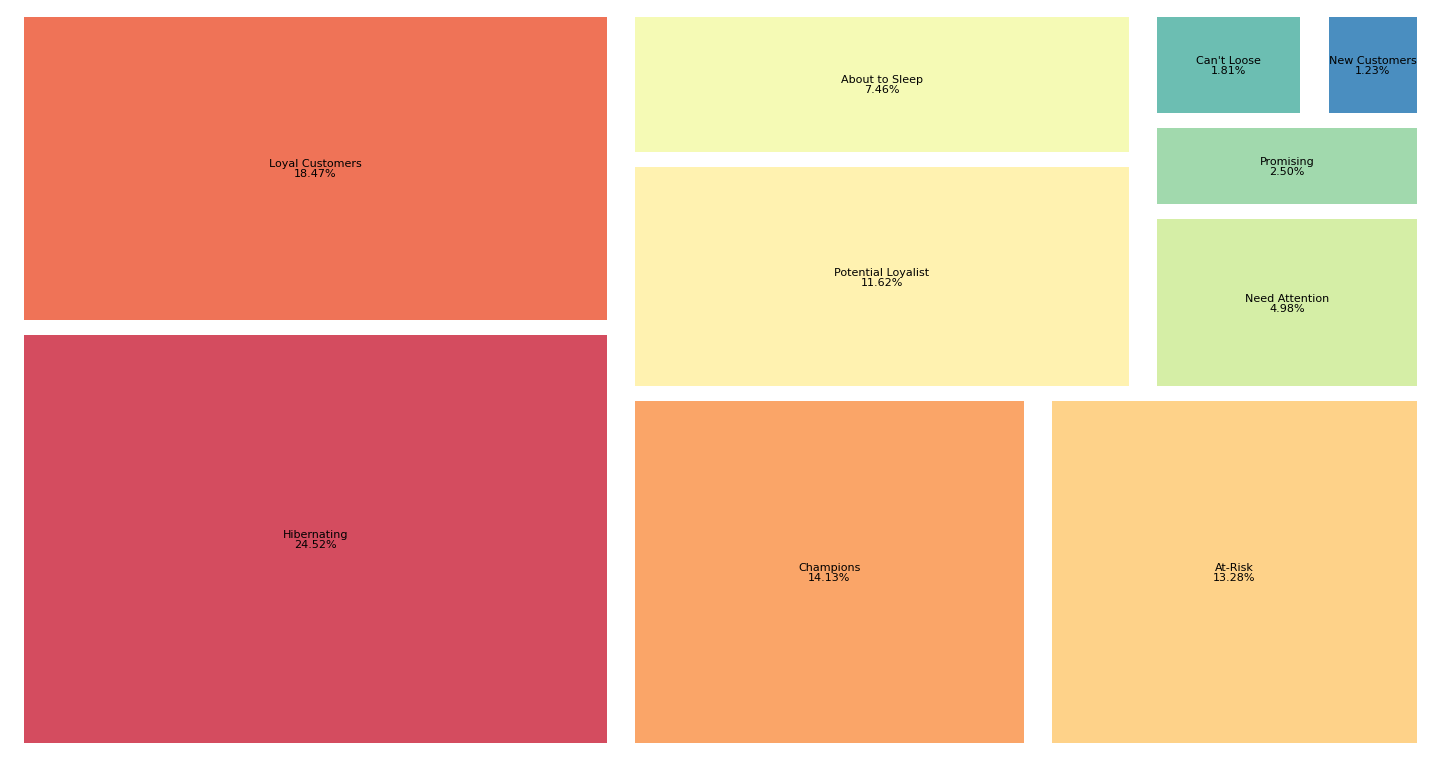

In [42]:
plt.figure(figsize=(15,8))
squarify.plot(sizes=rfm['Segment'].value_counts(), label=rfm['Segment'].value_counts().index,
              value=[f'{(x/3915)*100:.2f}%' for x in rfm['Segment'].value_counts()],alpha=0.9,pad=2,text_kwargs={'fontsize': 8},
             color=sns.color_palette("Spectral", 
                                     len(rfm['Segment'].value_counts().index)))
plt.tight_layout()
plt.axis("off")

### Customer Segmentations Using Machine Learning

In [90]:
df2 = pd.read_csv('segmentation data.csv', index_col=0)

In [91]:
df2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [115]:
df2.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


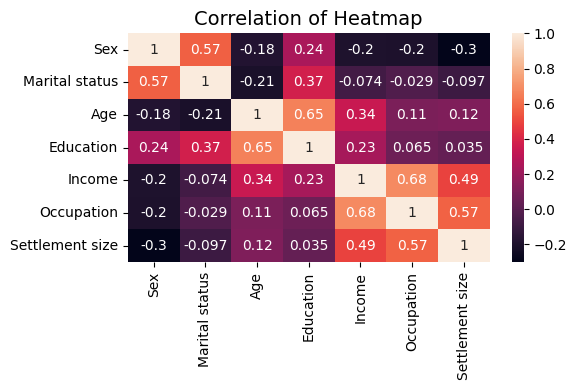

In [117]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation of Heatmap", fontsize=14)
plt.tight_layout()

### Before Standardized data 

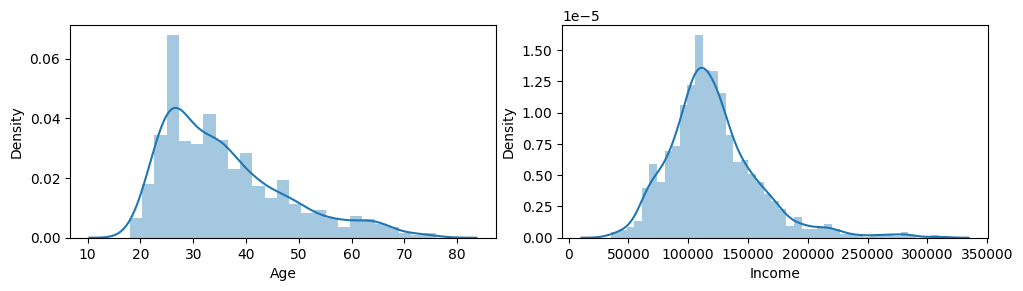

In [118]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.distplot(df2['Age'], kde=True);
plt.subplot(3,3,2)
sns.distplot(df2['Income'], kde=True);
plt.tight_layout()

In [119]:
scaler = StandardScaler()

In [120]:
df_std = scaler.fit_transform(df2)

In [121]:
df_std = pd.DataFrame(data=df_std, columns=df2.columns)

In [122]:
df_std

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


### After Standardization data

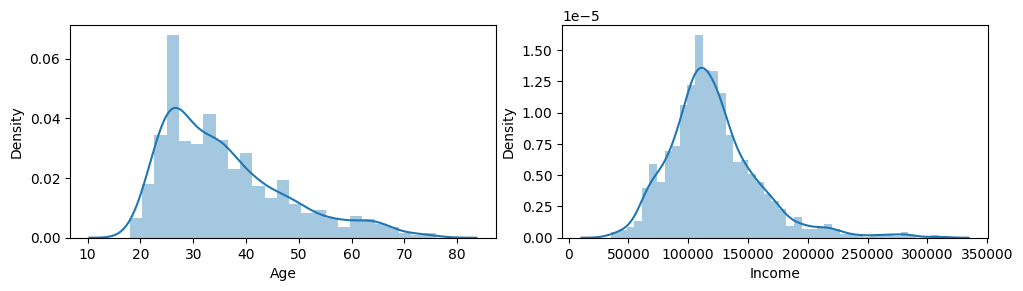

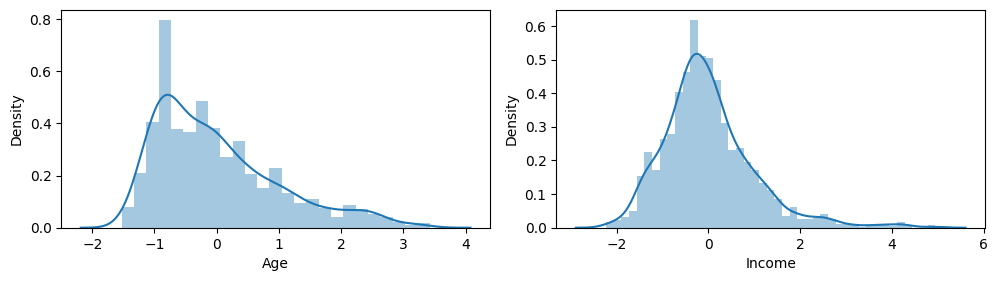

In [123]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.distplot(df2['Age'], kde=True);
plt.subplot(3,3,2)
sns.distplot(df2['Income'], kde=True);
plt.tight_layout()
########################################
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
sns.distplot(df_std['Age'], kde=True);
plt.subplot(3,3,2)
sns.distplot(df_std['Income'], kde=True);
plt.tight_layout()

In [124]:
wcss = []
for i in range(1,11):
    kmean_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmean_pca.fit(df_std)
    wcss.append(kmean_pca.inertia_)
    

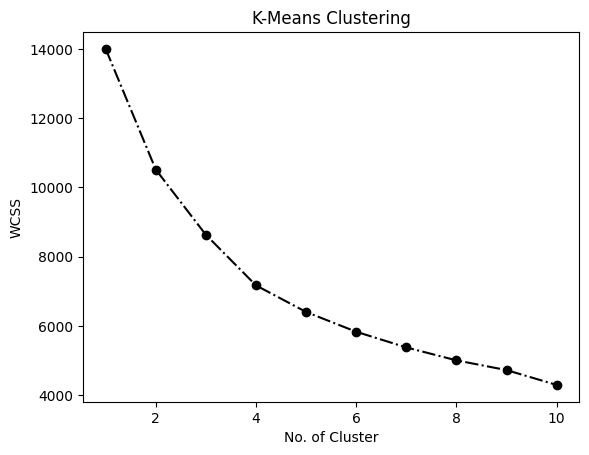

In [137]:
plt.plot(range(1,11), wcss, marker = 'o', linestyle='-.',color='black')
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

In [138]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [139]:
df_seg_kmeans = df_std.copy()
df_seg_kmeans['Segment'] = kmeans.labels_

In [140]:
df_seg_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3
...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,1
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,2
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,1
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,2


In [142]:
df_seg_analysis = df_seg_kmeans.groupby(['Segment']).mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [144]:
df_seg_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888
